FWHM =  1
Standard deviation =  0.1347340361479719
FWHM =  2
Standard deviation =  0.2645776365492896
FWHM =  3
Standard deviation =  0.4015386055528608
FWHM =  4
Standard deviation =  0.5336765219747573
FWHM =  5
Standard deviation =  0.6740857284003676
FWHM =  6
Standard deviation =  0.808991650252092
FWHM =  7
Standard deviation =  0.9286767989105823
FWHM =  8
Standard deviation =  1.0716257563684701
FWHM =  9
Standard deviation =  1.2153800395126857
FWHM =  10
Standard deviation =  1.3388137585765
FWHM =  11
Standard deviation =  1.4764237422891366
FWHM =  12
Standard deviation =  1.6008745354792555
FWHM =  13
Standard deviation =  1.7560398254355378
FWHM =  14
Standard deviation =  1.8825164473779559
FWHM =  15
Standard deviation =  2.023861694707801


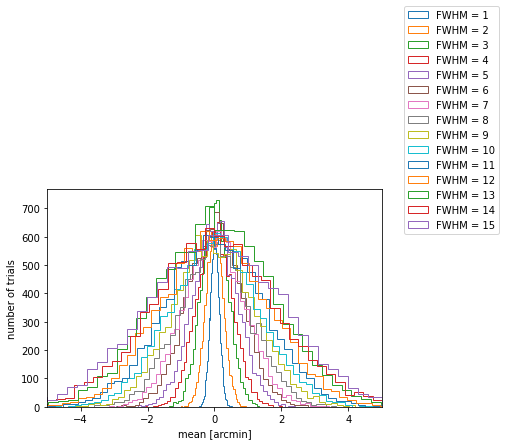

In [72]:
#FWHMを変化させて,それぞれのmeanをlistに入れて標準偏差を導出(FWHM補正)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import pyplot as plt
N=15
sigma_list=[]
two_sigma_list=[]
FWHM_list=[]
for FWHM in range(1,N+1):
    FWHM_list.append(FWHM)
    print("FWHM = ", FWHM)
    mean_list=[]
    for n in range(1,10001):
        a=np.random.normal(
            loc   = 0,
            scale = FWHM*0.42466452,
            size  = 10,
            )
        mean=np.mean(a)
        mean_list.append(mean)
        #print("n = ", n)
        #print("mean = ", mean)
    #print(mean_list)
    st_d=np.std(mean_list)
    print("Standard deviation = ", st_d)
    #print("2σ = " , st_d*2)
    plt.hist(mean_list,bins=50, histtype="step",label="FWHM = %d" %FWHM)
    plt.legend(bbox_to_anchor=(1.05,0.77))
    #plt.legend(loc="upper left")
    plt.xlabel("mean [arcmin]")
    plt.ylabel("number of trials")
    plt.xlim(-5,5)
    sigma_list.append(st_d*2)
    two_sigma_list.append(st_d*4)
#print(sigma_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
 
0.2695 x - 0.00754


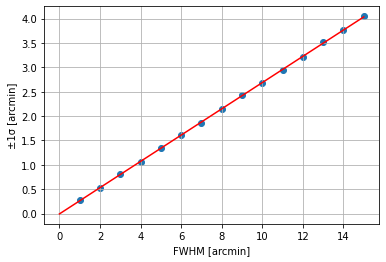

In [76]:
print(FWHM_list)
plt.scatter(FWHM_list,sigma_list)
plt.xlabel("FWHM [arcmin]")
plt.ylabel("±1σ [arcmin]")
plt.grid()

linear_model=np.polyfit(FWHM_list,sigma_list,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,N+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
 
0.5389 x - 0.01508


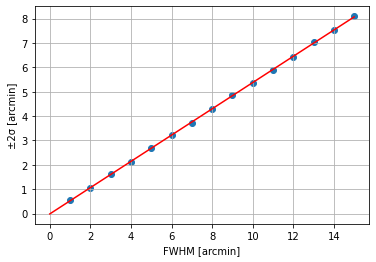

In [77]:
print(FWHM_list)
plt.scatter(FWHM_list,two_sigma_list)
plt.xlabel("FWHM [arcmin]")
plt.ylabel("±2σ [arcmin]")
plt.grid()

linear_model=np.polyfit(FWHM_list,two_sigma_list,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,N+1)
plt.plot(x_s,linear_model_fn(x_s),color="red")
print(linear_model_fn)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
 
0.2695 x - 0.00754
 
0.5389 x - 0.01508


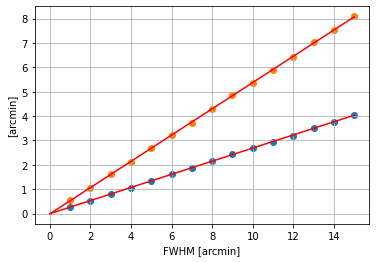

In [81]:
print(FWHM_list)
plt.scatter(FWHM_list,sigma_list)
plt.xlabel("FWHM [arcmin]")
plt.ylabel("[arcmin]")
plt.grid()

linear_model1=np.polyfit(FWHM_list,sigma_list,1)
linear_model_fn1=np.poly1d(linear_model1)
x_s=np.arange(0,N+1)
plt.plot(x_s,linear_model_fn1(x_s),color="red")
print(linear_model_fn1)

plt.scatter(FWHM_list,two_sigma_list)

linear_model2=np.polyfit(FWHM_list,two_sigma_list,1)
linear_model_fn2=np.poly1d(linear_model2)
x_s=np.arange(0,N+1)
plt.plot(x_s,linear_model_fn2(x_s),color="red")
print(linear_model_fn2)
plt.savefig("1-2sigma_FWHM.png")